# Car Price Prediction (KNN)

In this project, we studied 205 car sale data collected in 1985. I used the K-nearest neighbor algorithm to find the best features that are related to the car price at that time. It has been found that, horsepower and width are the top 2 features affecting car price in 1985, not MPG! likely due to low oil price in 1985. 
The lesson modern car manufacturers should learn from this 1985 car price example is: first, key features that influence the price might not be many, could be only two; second, they should currently focus more on practicability rather than MPG, SUV than sedan, as oil price is expected to stay low for the next 20 years(reference: https://www.brookings.edu/blog/up-front/2018/11/14/oil-prices-are-tumbling-volatility-aside-expect-them-to-stay-low-over-the-next-20-years/).

In [31]:
import numpy as np
import pandas as pd

pd.options.display.max_rows = 20

# Stage 1 - Sourcing and loading data

## 1a. Source and load the data

In [32]:
cars = pd.read_csv('imports-85.data')

In [33]:
cars

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
200,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
201,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
202,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [34]:
# Change the columns names, if use df.columns = [''], it will replace the first row with the column names.
# pd.read_csv('', index_col = ?), this will use one column (index either through number or column name) as index 
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = cols)


In [35]:
cars

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


## 1b. Pick the columns that will be used to predict the car price

##### Those columns seem to relate to car price  ['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',  'drive-wheels', 'engine-location', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg'] 

In [36]:
cars['engine-type'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: engine-type, dtype: int64

In [37]:
cars[['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',  'drive-wheels', 'engine-location', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg']].head(2)

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,length,width,height,curb-weight,engine-type,num-of-cylinders,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg
0,?,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,9.0,111,5000,21,27
1,?,alfa-romero,gas,std,two,convertible,rwd,front,168.8,64.1,48.8,2548,dohc,four,9.0,111,5000,21,27


##### Choose those numeric columns to predict car price: ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

## 1c. Subsetting accordingly

In [38]:
numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars_numeric = cars[numeric_cols]

In [39]:
cars_numeric

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95,109.1,188.8,68.9,55.5,2952,3.78,3.15,9.5,114,5400,23,28,16845
201,95,109.1,188.8,68.8,55.5,3049,3.78,3.15,8.7,160,5300,19,25,19045
202,95,109.1,188.8,68.9,55.5,3012,3.58,2.87,8.8,134,5500,18,23,21485
203,95,109.1,188.8,68.9,55.5,3217,3.01,3.40,23.0,106,4800,26,27,22470


# Stage 2 - Cleaning and transforming

## 2a. Replace all ? with NaN

In [54]:
cars_numeric = cars_numeric.replace('?', np.nan)
cars_numeric

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,122.0,88.6,168.8,64.1,48.8,2548.0,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,122.0,94.5,171.2,65.5,52.4,2823.0,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,164.0,99.8,176.6,66.2,54.3,2337.0,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,164.0,99.4,176.6,66.4,54.3,2824.0,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,95.0,109.1,188.8,68.9,55.5,2952.0,3.78,3.15,9.5,114.0,5400.0,23.0,28.0,16845.0
201,95.0,109.1,188.8,68.8,55.5,3049.0,3.78,3.15,8.7,160.0,5300.0,19.0,25.0,19045.0
202,95.0,109.1,188.8,68.9,55.5,3012.0,3.58,2.87,8.8,134.0,5500.0,18.0,23.0,21485.0
203,95.0,109.1,188.8,68.9,55.5,3217.0,3.01,3.40,23.0,106.0,4800.0,26.0,27.0,22470.0


## 2b. Convert all data to float

In [41]:
cars_numeric = cars_numeric.astype('float')
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## 2c. Replace NaN in 'normalized-losses' column with its mean

In [42]:
cars_numeric['normalized-losses'].value_counts(dropna=False)

NaN      41
161.0    11
91.0      8
150.0     7
104.0     6
         ..
77.0      1
90.0      1
256.0     1
231.0     1
142.0     1
Name: normalized-losses, Length: 52, dtype: int64

In [43]:
cars_numeric['normalized-losses'].mean()

122.0

In [44]:
cars_numeric['normalized-losses'].notnull().sum()

164

In [45]:
cars_numeric.loc[cars_numeric['normalized-losses'].isnull(), 'normalized-losses'] = 122.0

In [46]:
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

## 2d. Remove the Price rows with NaN values

In [47]:
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 4
stroke               4
compression-rate     0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [48]:
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [55]:
cars_numeric['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

## 2e. Normalize all columns to 0 and 1

In [20]:
cars_numeric_N = (cars_numeric - cars_numeric.min())/(cars_numeric.max() - cars_numeric.min())

In [21]:
cars_numeric.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


# Stage 3 - Modeling

## 3a. Univariate Knn model, K = 5

In [22]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

knn = KNeighborsRegressor()
rmse_uniV_k5 = {}
cars_numeric_cols = cars_numeric.columns.drop('price')

def knn_train_test(df, train_col, target_col):
# Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.loc[shuffled_index]
# seperate the data frame to 1/2 and 1/2   
    train_set = df.iloc[:97]
    test_set = df.iloc[97:]
# fit and predict    
    knn.fit(train_set[[train_col]], train_set[[target_col]])
    prediction = knn.predict(test_set[[train_col]])
    RMSE = mean_squared_error(test_set[[target_col]], prediction)**(0.5)
    return RMSE
# Loop through all the columns expect 'price'
for i in cars_numeric_cols:
    rmse_uniV_k5[i] = knn_train_test(cars_numeric, i, 'price')

rmse_uniV_k5

# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_uniV_k5 = pd.Series(rmse_uniV_k5)
rmse_uniV_k5.sort_values()

horsepower           4147.155850
curb-weight          4334.010111
highway-mpg          4664.212207
width                4694.264043
city-mpg             4871.087068
wheel-base           5462.752156
length               5589.405329
compression-rate     6575.729172
normalized-losses    7275.034235
peak-rpm             7602.587013
height               7756.068474
bore                 7798.411943
stroke               7876.789955
dtype: float64

#### highway-mpg, city-mpg, horsepower, curb-weight, features can be used.

## 3b. Multivariate Knn model, K = 1, 3, 5, 7, 9

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


rmse_uniV_k9 = {}
cars_numeric_cols = cars_numeric.columns.drop('price')

def knn_train_test(df, train_col, target_col, k):
# Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df_R = df.loc[shuffled_index]
# seperate the data frame to 1/2 and 1/2   
    train_set = df_R.iloc[:97]
    test_set = df_R.iloc[97:]
    rmse_list = {}
# fit and predict
    for i in k:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_set[[train_col]], train_set[[target_col]])
        prediction = knn.predict(test_set[[train_col]])
        RMSE = mean_squared_error(test_set[[target_col]], prediction)**(0.5)
        rmse_list[i] = RMSE
    return rmse_list

kneighbor = [1, 3, 5, 7, 9]
# Loop through all the columns expect 'price'
for i in cars_numeric_cols:
    rmse_uniV_k9[i] = knn_train_test(cars_numeric, i, 'price', kneighbor)

rmse_uniV_k9

{'normalized-losses': {1: 8094.63789278956,
  3: 6981.096570596302,
  5: 7275.034235446805,
  7: 7896.980333852276,
  9: 7578.648173124531},
 'wheel-base': {1: 4886.231843148665,
  3: 5299.758357053875,
  5: 5462.752156475427,
  7: 5644.756523515639,
  9: 5871.878216540773},
 'length': {1: 5004.551864591336,
  3: 5333.857000633325,
  5: 5589.405328765375,
  7: 5467.354881002281,
  9: 5509.360204927617},
 'width': {1: 4689.48519603657,
  3: 4626.9577555431815,
  5: 4694.264043489671,
  7: 4778.324248768979,
  9: 4773.777194005361},
 'height': {1: 8446.9017499363,
  3: 7943.5726924135415,
  5: 7756.068474426976,
  7: 7704.900567808232,
  9: 7753.822803565239},
 'curb-weight': {1: 5543.8399806243715,
  3: 5032.24925273646,
  5: 4334.010110607283,
  7: 4346.759191579858,
  9: 4558.50309094986},
 'bore': {1: 10473.194669102788,
  3: 7854.373661422524,
  5: 7798.411943195179,
  7: 7216.662046922372,
  9: 6804.6223410660095},
 'stroke': {1: 8572.663767868367,
  3: 7588.468168281766,
  5: 7876

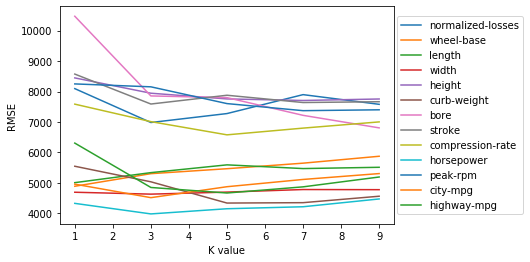

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

for key, value in rmse_uniV_k9.items():
    x = list(value.keys())
    y = list(value.values())
    plt.plot(x, y, label = key)
    plt.legend(loc='right', bbox_to_anchor=(1.4,0.5))
    plt.xlabel('K value')
    plt.ylabel('RMSE')


## 3c. Multivariate Knn model

### 3c-1. Find the top 5 best features

In [25]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for key,value in rmse_uniV_k9.items():
    avg_rmse = np.mean(list(value.values()))
    feature_avg_rmse[key] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
series_avg_rmse.sort_values()

horsepower           4225.859654
width                4712.561688
curb-weight          4763.072325
city-mpg             4950.054851
highway-mpg          5174.353429
length               5380.905856
wheel-base           5433.075419
compression-rate     6993.552326
normalized-losses    7565.279441
peak-rpm             7754.846140
stroke               7867.967807
height               7921.053258
bore                 8029.452932
dtype: float64

### 3b-2. Multivariate 5 features, K = 5

In [26]:
rmse_multiV_top5 = {}
cars_numeric_cols = cars_numeric.columns.drop('price')

def knn_train_test(df, train_col, target_col):
# Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df_R = df.loc[shuffled_index]
# seperate the data frame to 1/2 and 1/2   
    train_set = df_R.iloc[:97]
    test_set = df_R.iloc[97:]
# fit and predict
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_col], train_set[[target_col]])
    prediction = knn.predict(test_set[train_col])
    RMSE = mean_squared_error(test_set[[target_col]], prediction)**(0.5)
    return RMSE

# Loop through the top 5 features

rmse_multiV_top5['two features'] = knn_train_test(cars_numeric, ['horsepower', 'width'], 'price')
rmse_multiV_top5['three features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight'], 'price')
rmse_multiV_top5['four features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight', 'city-mpg'], 'price')
rmse_multiV_top5['five features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg'], 'price')
rmse_multiV_top5['six features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length'], 'price')
rmse_multiV_top5

{'two features': 3977.6973268752827,
 'three features': 3927.038304351787,
 'four features': 3928.3373093656114,
 'five features': 3928.4326345052878,
 'six features': 3922.728837713712}

### 3b-3. Multivariate 3 features, K 1 - 25

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

rmse_multiV_top3_k25 = {}
cars_numeric_cols = cars_numeric.columns.drop('price')

def knn_train_test(df, train_col, target_col, k):
# Randomize order of rows in data frame
    np.random.seed(1)
    shuffled_index = np.random.permutation(df.index)
    df = df.loc[shuffled_index]
# seperate the data frame to 1/2 and 1/2   
    train_set = df.iloc[:97]
    test_set = df.iloc[97:]
    rmse_list = []
# fit and predict
    for i in k:
        knn = KNeighborsRegressor(n_neighbors = i)
        knn.fit(train_set[train_col], train_set[[target_col]])
        prediction = knn.predict(test_set[train_col])
        RMSE = mean_squared_error(test_set[[target_col]], prediction)**(0.5)
        rmse_list.append(RMSE)
    return rmse_list

kneighbor2 = [i for i in range(1, 25)]

rmse_multiV_top3_k25['two features'] = knn_train_test(cars_numeric, ['horsepower', 'width'], 'price', kneighbor2)
rmse_multiV_top3_k25['three features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight'], 'price', kneighbor2)
rmse_multiV_top3_k25['four features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight', 'city-mpg'], 'price', kneighbor2)
rmse_multiV_top3_k25['five features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg'], 'price', kneighbor2)
rmse_multiV_top3_k25['six features'] = knn_train_test(cars_numeric, ['horsepower', 'width', 'curb-weight' , 'city-mpg' , 'highway-mpg', 'length'], 'price', kneighbor2)

rmse_multiV_top3_k25

{'two features': [3375.1272967446384,
  3539.2827371190947,
  3646.607530839364,
  3826.3578491855724,
  3977.6973268752827,
  4264.771149209322,
  4262.038281433179,
  4312.980064991679,
  4407.789528767739,
  4549.507666210032,
  4666.355979190101,
  4579.802239968981,
  4731.587765569188,
  4894.809750032271,
  5097.951170344188,
  5251.62008709457,
  5323.915576032361,
  5277.309288029444,
  5247.53662394521,
  5280.189807010055,
  5274.137634727899,
  5259.001724786786,
  5292.149588289436,
  5297.312114426861],
 'three features': [4660.493215274043,
  4312.175520122778,
  3854.398740622122,
  3967.6829386232853,
  3927.038304351787,
  3923.0583131759668,
  4060.534552861766,
  4211.855807978892,
  4430.309387422181,
  4449.488709585717,
  4587.567091799072,
  4674.198059982015,
  4703.995496166911,
  4830.337181846185,
  4901.261787701326,
  4966.47745753849,
  4991.528954085543,
  5039.209948117354,
  5032.498518880202,
  5044.777038104131,
  5080.661252851038,
  5119.7815755244

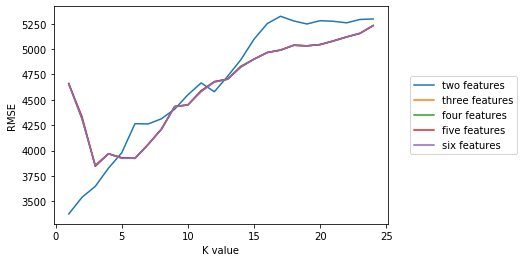

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

for i in rmse_multiV_top3_k25.keys():
    plt.plot(kneighbor2, rmse_multiV_top3_k25[i], label = i)
    plt.legend(loc='right', bbox_to_anchor=(1.4,0.5))
    plt.xlabel('K value')
    plt.ylabel('RMSE')

# Conclusion

- Horsepower and width are the top 2 features that highly influenced the car price in 1985. 
- MPG(miles per gallow) was initially thought as an important feature for car price, however, our model show otherwise. Probably because, in 1985, oil price was low, mpg wasn't a big concern for drivers. On the other hand, buyers in 1985 favors cars with more spaces and practibablity, as affected by width. 
- The enlightment of this 1985 car price prediction for modern cars are: <br> 
    - 1) key features that influence the price might not be too many, could be only two. For car manufacturers, focus on improving one or two features buyers really need is probably a better strategy than trying improve all features but could only do average on each feature <br> 
    - 2) key features that influence the price might not be many, could be only two; second, they should currently focus more on practicability rather than MPG, SUV than sedan, as oil price is expected to stay low for the next 20 years